# Sectors vs Factors
Table fo contents
- [Import datas and analysis definition](#id)
- [Whole period analysis](#wop)
- [1 year before the start of the COVID-19 pandemic](#1y)
- [From the start of the COVID-19 pandemic to Start of the war in Ukraine](#covid)
- [From the war in Ukraine to today](#war)



<a id="id"></a>
## Import datas and analysis definition
- Import S&P 500 sectors  index form Yfinance
    - "^SP500-25": "Consumer Discretionary",
    - "^SP500-30": "Consumer Staples", 
    - "^GSPE": "Energy",
    - "^SP500-40": "Financials",
    - "^SP500-35": "Health Care",
    - "^SP500-20": "Industrials",
    - "^SP500-45": "Information Technology",
    - "^SP500-15": "Materials",
    - "^SP500-60": "Real Estate",
    - "^SP500-55": "Utilities"
- Import Ishares factors ETF data from Yfinance
    - "VLUE": "Value",
    - "QUAL": "Quality",
    - "SIZE": "Size",
    - "MTUM": "Momentuim"
    
- clean the data for the analysis
- Creation of a general function <code>cluster_analysis(fomr_date, to_date, element)</code> with parameters:
    - <code>fomr_date</code> and <code>to_date</code> in format <code>"yyyy-mm-dd"</code> and values from <code>"2019-01-30"</code> to <code>date.today()</code>
    - <code>date.today()</code>: <code>sectors_returns</code> for sectors analysis and <code>factors_returns</code> for factors analysis



In [94]:
import yfinance as yf
from datetime import date
import seaborn as sns
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sectors_data = pd.DataFrame(
    yf.download(
        tickers = "^SP500-50 ^SP500-25 ^SP500-30 ^GSPE ^SP500-40 ^SP500-35 ^SP500-20 ^SP500-45 ^SP500-15 ^SP500-60 ^SP500-55",
        start="2019-01-30", end= date.today(),
        interval = "1d"
    )
)["Close"]

sectors_data.rename({"^SP500-50" : "Communication Services",
    "^SP500-25": "Consumer Discretionary",
    "^SP500-30": "Consumer Staples", 
    "^GSPE": "Energy",
    "^SP500-40": "Financials",
    "^SP500-35": "Health Care",
    "^SP500-20": "Industrials",
    "^SP500-45": "Information Technology",
    "^SP500-15": "Materials",
    "^SP500-60": "Real Estate",
    "^SP500-55": "Utilities"
    }, axis=1, inplace=True
)
sectors_returns = pd.DataFrame(np.log(sectors_data/sectors_data.shift(1)))

factors_data = pd.DataFrame(
    yf.download(
        tickers = "VLUE QUAL  MTUM SIZE",
        start="2019-01-30", end= date.today(),
        interval = "1d"
    )
)["Close"]

factors_data.rename({
    "VLUE": "Value",
    "QUAL": "Quality",
    "SIZE": "Size",
    "MTUM": "Momentuim"
    }, axis=1, inplace=True
)
factors_returns = pd.DataFrame(np.log(factors_data/factors_data.shift(1)))

def cluster_analysis(fomr_date, to_date, returns):
    returns_period = returns.loc[fomr_date:to_date]
    corr_period = returns_period.corr()
    if returns is sectors_returns:
        sns.clustermap(corr_period, cmap="YlGnBu", annot=True, figsize=(7.5, 7.5),  vmin=min(factors_returns.corr().min().min(), sectors_returns.corr().min().min()), vmax=1)
    elif returns is factors_returns:
        sns.clustermap(corr_period, cmap="YlGnBu", annot=True, figsize=(4, 4), vmin=1, vmax=-1)
    else: print("return definition error")




[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  4 of 4 completed


<a id="wop"></a>
## Whole period analysis 

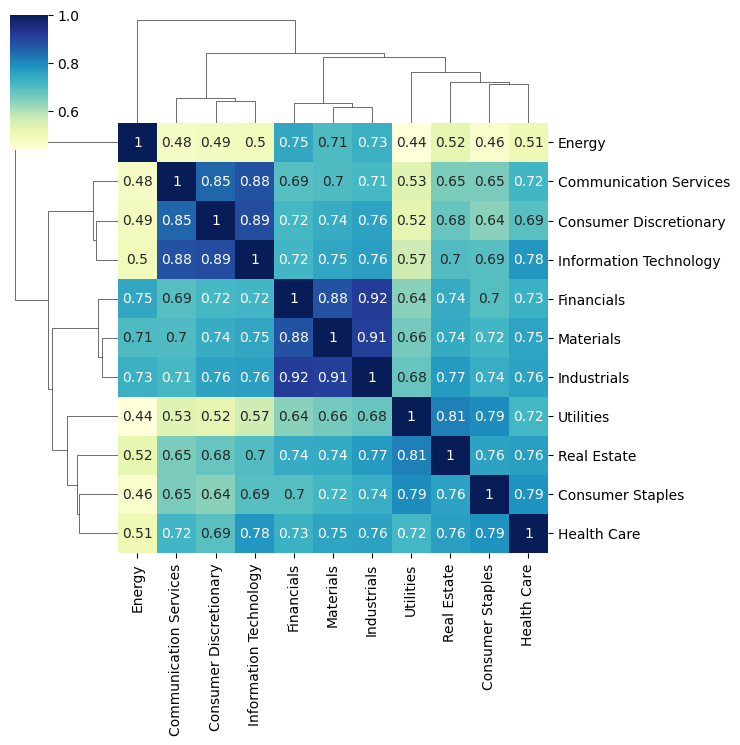

In [95]:
cluster_analysis(None, None, sectors_returns)

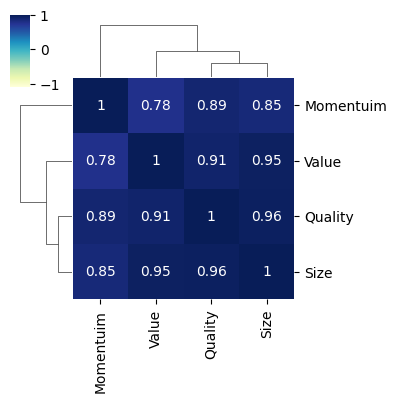

In [96]:
cluster_analysis(None, None, factors_returns)

<a id="1y"></a>

## 1 year before the start of the COVID-19 pandemic

In [ ]:
cluster_analysis(None, '2020-01-29', factors_returns)

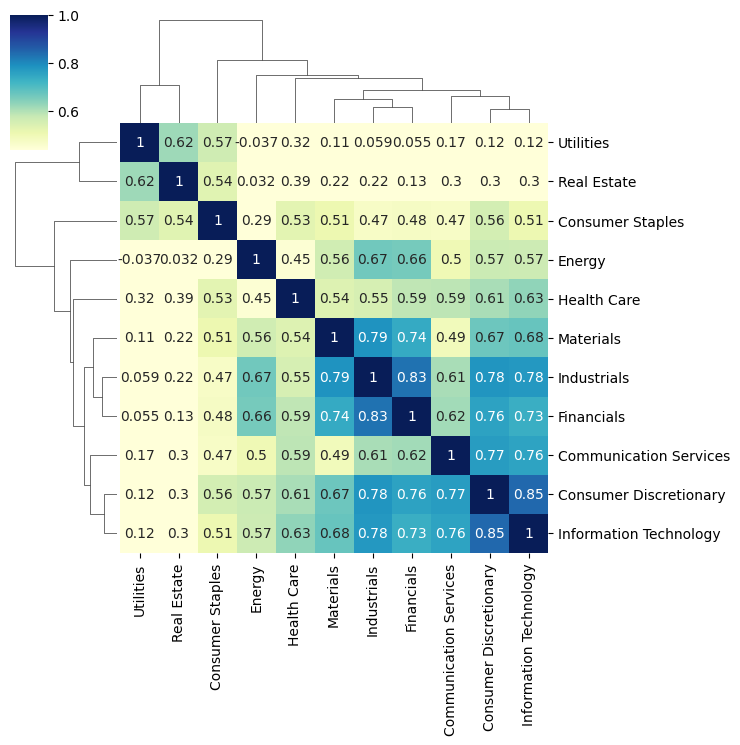

In [98]:
cluster_analysis(None, '2020-01-29', sectors_returns)

<a id="covid"></a>

## From the start of the COVID-19 pandemic to Start of the war in Ukraine

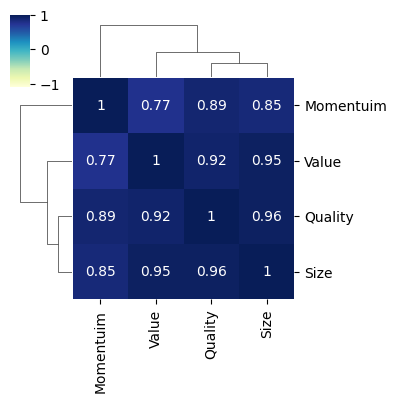

In [99]:
cluster_analysis('2020-01-31', '2022-02-23', factors_returns)

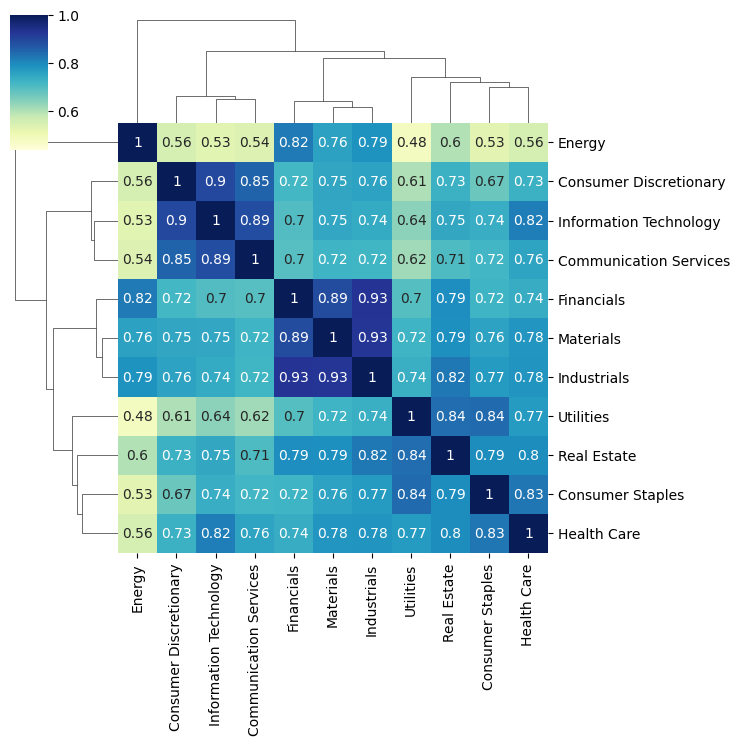

In [100]:
cluster_analysis('2020-01-31', '2022-02-23', sectors_returns)

<a id="war"></a>

## From the start of the war in Ukraine to today

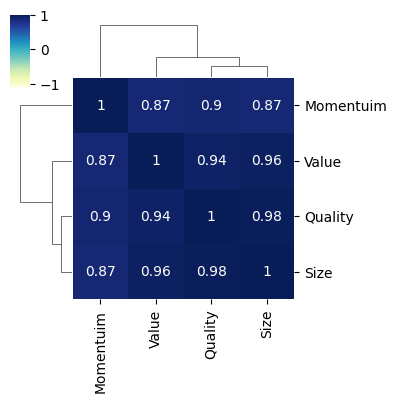

In [101]:
cluster_analysis('2022-02-24', None, factors_returns)

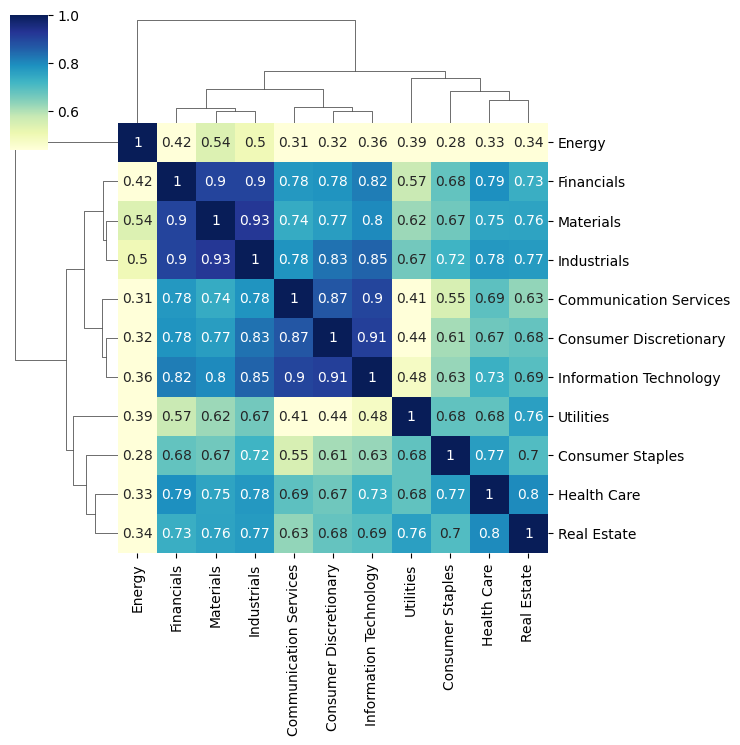

In [102]:
cluster_analysis('2022-02-24', None, sectors_returns)